# Statistical Analysis of SARS-CoV-2 (2019)
## Andrew Richard, Clay Richard, and Dakota Sanders -- March 13, 2020

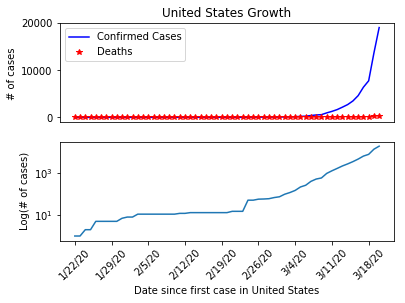

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

#cutting out all non-US data from dataframe
df = confirmed_df[confirmed_df['Country/Region'] == 'US']
df2 = deaths_df[deaths_df['Country/Region'] == 'US']
# Dropping all columns except dates
df_US_conf = df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_US_dead = df2.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
US_conf_column_totals = df_US_conf.sum()
US_dead_column_totals = df_US_dead.sum()
#creating a new pandas DataFrame with only the US totals
US_frame_conf = {'US Total':US_conf_column_totals}
df_US_conf = pd.DataFrame(US_frame_conf)
US_frame_dead = {'US Total':US_dead_column_totals}
df_US_dead = pd.DataFrame(US_frame_dead)
# Plotting the US Data
fig = plt.figure()
plt.subplot(211)
plt.title('United States Growth')
plt.xticks([])
plt.ylabel('# of cases ')
plt.plot(df_US_conf,'b-', label='Confirmed Cases')
plt.plot(df_US_dead, 'r*', label='Deaths')
plt.legend()
plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_US_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_US_conf)
plt.show()

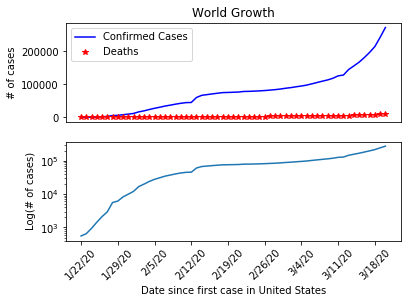

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
try:
    deaths_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()
# Dropping all columns except dates
df_world_conf = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_world_dead = deaths_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
# summing data for each date
world_column_totals_conf = df_world_conf.sum()
world_column_totals_dead = df_world_dead.sum()
#creating a new pandas DataFrame with World totals
world_frame_conf = {'World Total':world_column_totals_conf}
df_world_conf = pd.DataFrame(world_frame_conf)
world_frame_dead = {'World Total':world_column_totals_dead}
df_world_dead = pd.DataFrame(world_frame_dead)
# Plotting the World Data
fig = plt.figure()
plt.subplot(211)
plt.title('World Growth')
plt.xticks([])
plt.ylabel('# of cases')
plt.plot(df_world_conf, 'b-', label='Confirmed Cases')
plt.plot(df_world_dead, 'r*', label='Deaths')
plt.legend()
plt.subplot(212)
plt.yscale('log')
plt.xticks(np.arange(0,len(df_world_conf),step=7), rotation=45)
plt.xlabel(xlabel='Date since first case in United States')
plt.ylabel('Log(# of cases)')
plt.plot(df_world_conf)
plt.show()

# Exponential Growth Model - Check out this 3Blue1Brown video: https://www.youtube.com/watch?v=Kas0tIxDvrg&t=303s
### N = number of cases on a given day
### E = average number of people one infected person is exposed to in one day
### p = probability of each exposure becoming an infection
### ∆N = E*p*N, where E*p = R which is the growth factor = (daily new cases)/(previous daily new cases)
### *a ratio between two successive changes*
### So we can set the equation: N(t) = R*N0^t, where N0 is the initial value and t is the number of days since the outbreak
### but since we want to include the people already infected, we should use logistic Model
### so we'll get dN/dt = c(1-(N(t)/P))*N(t)

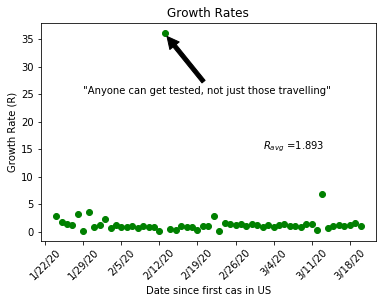

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    confirmed_df = pd.read_csv(
        'COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
except IOError:
    print("Dataset not available, please clone repo listed in README")
    exit()

# Dropping all columns except dates
df_world = confirmed_df.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])

# summing data for each date
world_column_totals = df_world.sum()

#creating a new pandas DataFrame with World totals
world_frame = {'World Total':world_column_totals}
df_world = pd.DataFrame(world_frame)
df_world['diff'] = df_world['World Total'].diff()
df_world['shift'] = df_world['diff'].shift(1)
df_world['R'] = df_world['diff']/df_world['shift']
average_growth_rate = np.nanmean(df_world['R'])
R_avg = round(average_growth_rate, 3)
# print(average_growth_rate)
fig = plt.figure()
plt.title('Growth Rates')
plt.xticks(np.arange(0,len(df_world),step=7), rotation=45)
plt.xlabel('Date since first cas in US')
plt.ylabel('Growth Rate (R)')
plt.text(40,15,'$R_{avg}$ =' + str(R_avg))
plt.annotate('"Anyone can get tested, not just those travelling"',xy=(22,36), xytext=(7,25),\
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(df_world['R'], 'go')
plt.show()

### more or less constant growth rate suggests the virus is not at the inflection point yet. 

## Attempt at a heatmap
The goal is to try to use geopandas to generate a heatmap for each day from data found in the daily reports.
Note: You'll need to install `geopandas` and `descartes` using pip.

In [1]:
import datetime
import geopandas as gpd

time_format = "COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/%m-%d-%Y.csv"
current_date = datetime.date(2020,3,1)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<Figure size 1440x1440 with 0 Axes>

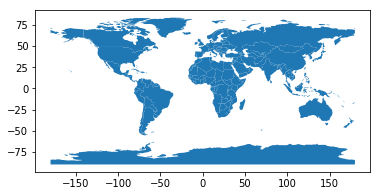

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Change figure size (i think this is right)
plt.figure(figsize=(20,20))
world.plot()

In [4]:
# Now read in data
import pandas as pd

spatial_df = pd.read_csv(current_date.strftime(time_format))
spatial_df_new = pd.DataFrame({"Location": spatial_df['Province/State'], "Confirmed": spatial_df["Confirmed"], "Lat": spatial_df["Latitude"], "Long": spatial_df["Longitude"]})
spatial_df_new.Location.fillna(spatial_df["Country/Region"], inplace=True)
spatial_df_new.set_index("Location")

,Confirmed,Lat,Long
Location,,,
Hubei,66907,30.9756,112.2707
South Korea,3736,36.0000,128.0000
Italy,1694,43.0000,12.0000
Guangdong,1349,23.3417,113.4244
Henan,1272,33.8820,113.6140
...,...,...,...
"Tempe, AZ",1,33.4255,-111.9400
From Diamond Princess,0,35.4437,139.6380
"Lackland, TX (From Diamond Princess)",0,29.3829,-98.6134


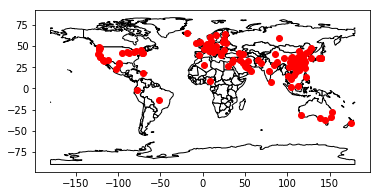

In [6]:
# Now to convert to valid GIS data? I have no clue what this looks like.
geo_points = gpd.GeoDataFrame(spatial_df_new, geometry=gpd.points_from_xy(spatial_df_new["Long"], spatial_df_new["Lat"]))
ax = world.plot(color='white', edgecolor='black')
geo_points.plot(ax=ax, color='red')
plt.show()

/Users/DrewRichard/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


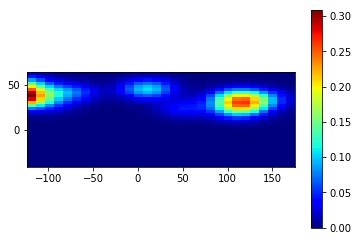

In [7]:
# Copied from https://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434
from scipy import ndimage

def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

heatmap(geo_points, bins=30, smoothing=2)
# This is worth playing more with, but I wanna try something else first

In [8]:
# What if we use folium?
import folium
from folium.plugins import HeatMap

max_amount = float(spatial_df_new['Confirmed'].max())

hmap = folium.Map(location=[42.5, -75.5], zoom_start=3, )
hm_wide = HeatMap( list(zip(spatial_df_new["Lat"], spatial_df_new["Long"], spatial_df_new["Confirmed"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=20, blur=15, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wide)